In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import warnings
warnings.filterwarnings ('ignore')

In [2]:
data=pd.read_csv('Bank Marketing Prediction Train.csv')
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [3]:
data.shape

(31647, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [5]:
data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [7]:
Categorical= data.select_dtypes(include='object')

In [8]:
Categorical

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,admin.,married,unknown,no,no,no,telephone,nov,unknown,no
1,unknown,married,secondary,no,no,no,cellular,jul,unknown,no
2,services,married,secondary,no,yes,no,cellular,jul,unknown,no
3,management,divorced,tertiary,no,no,no,cellular,jun,success,yes
4,technician,married,secondary,no,yes,no,cellular,feb,unknown,no
...,...,...,...,...,...,...,...,...,...,...
31642,management,single,tertiary,no,yes,no,cellular,may,unknown,no
31643,management,divorced,tertiary,no,no,yes,cellular,jun,unknown,yes
31644,management,single,tertiary,no,no,no,cellular,aug,unknown,no
31645,technician,married,secondary,no,yes,no,telephone,may,failure,no


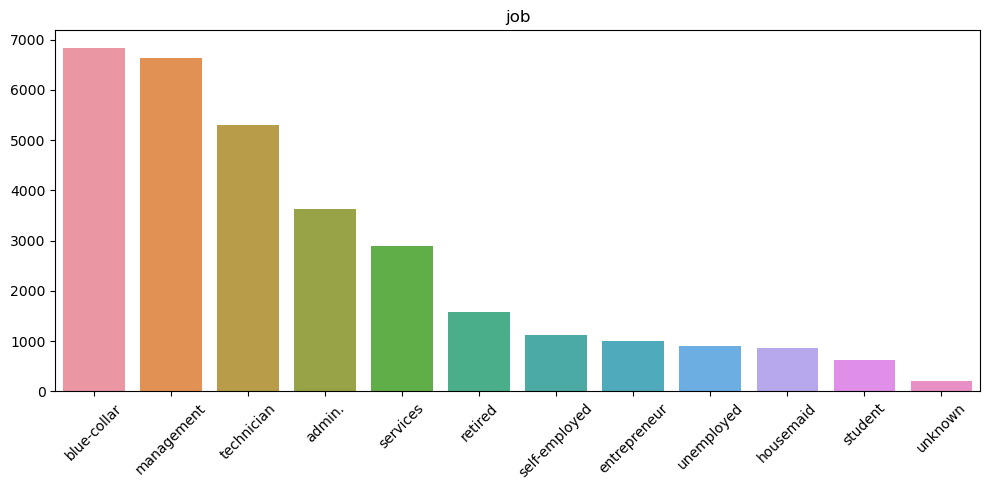

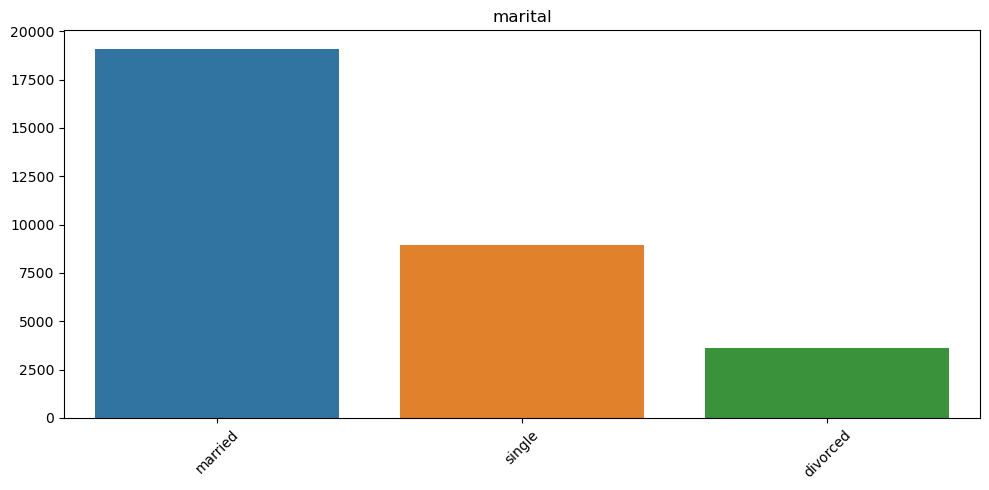

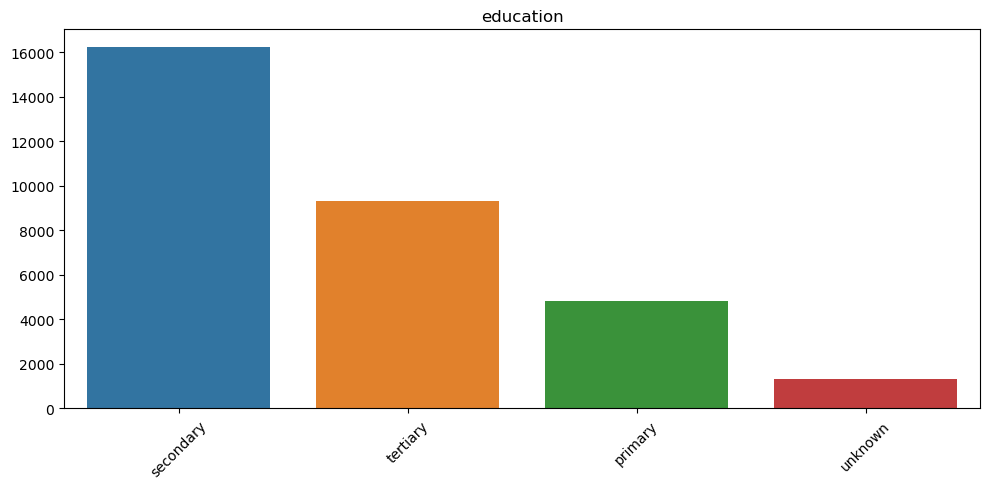

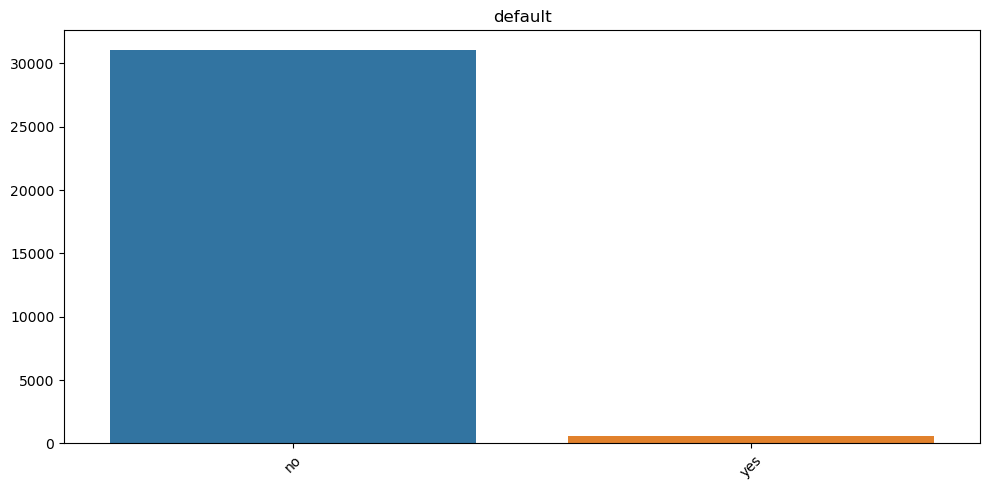

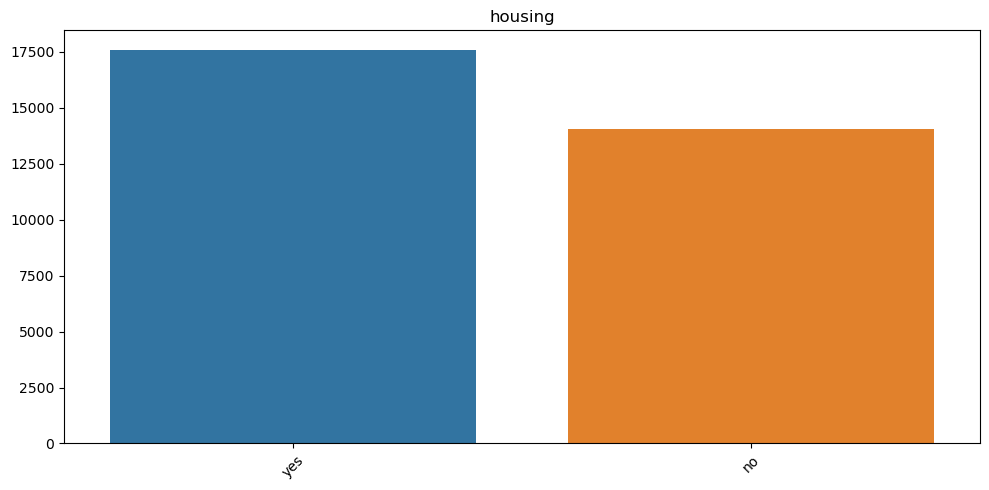

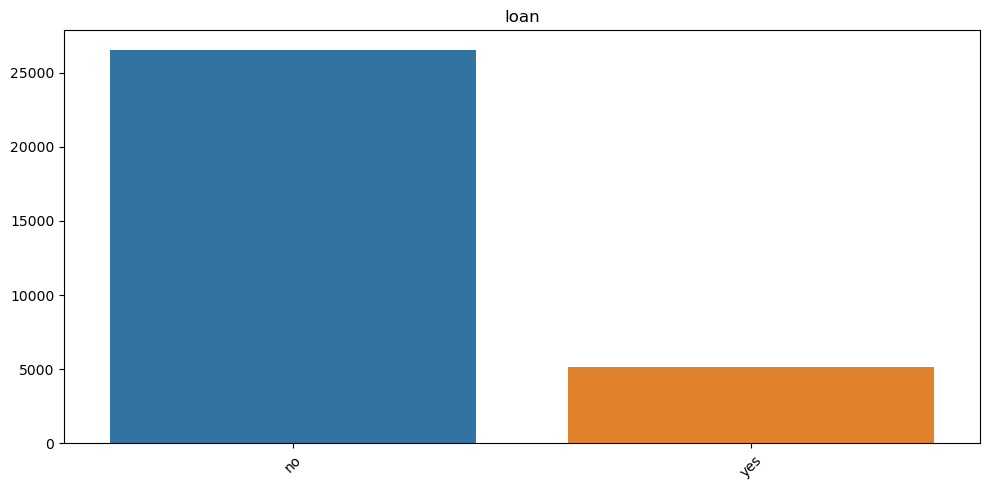

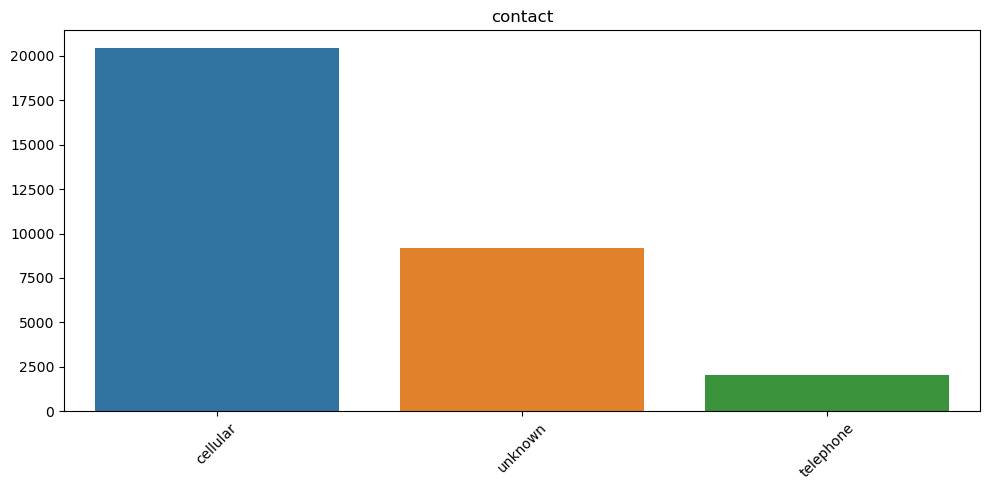

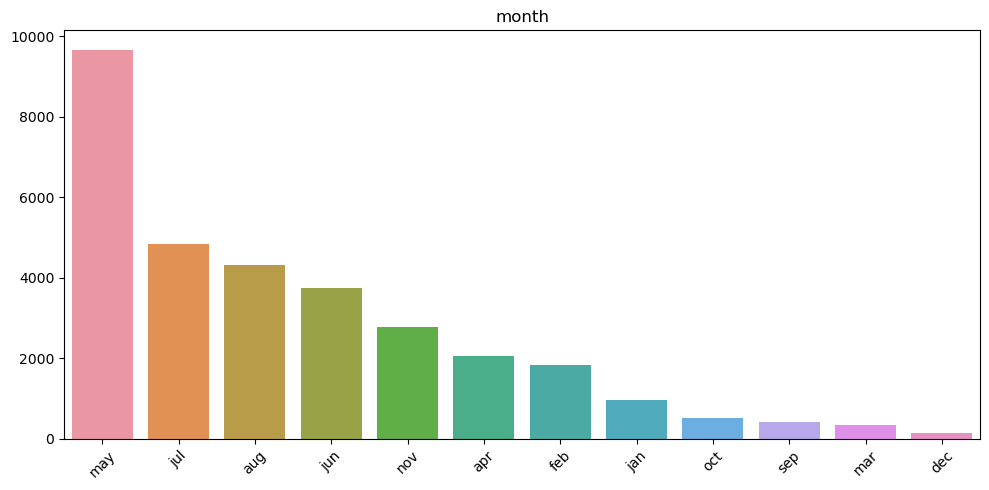

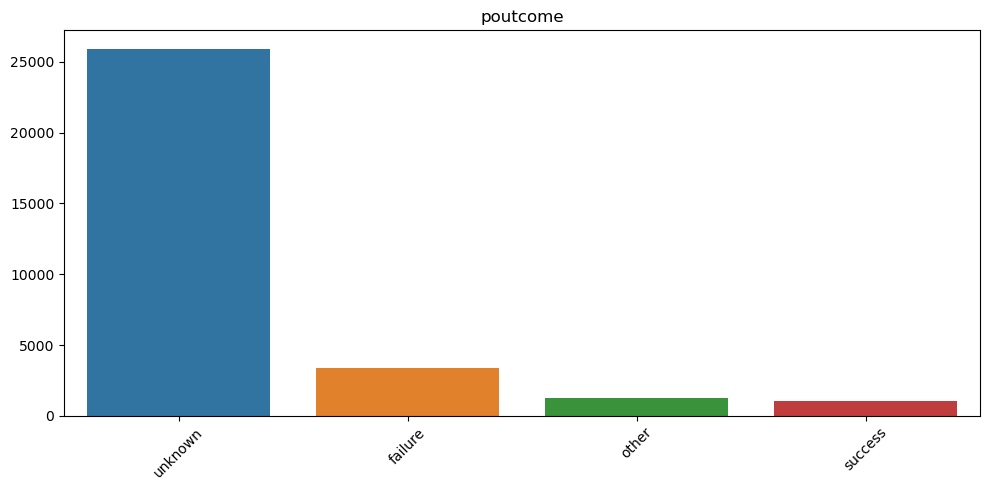

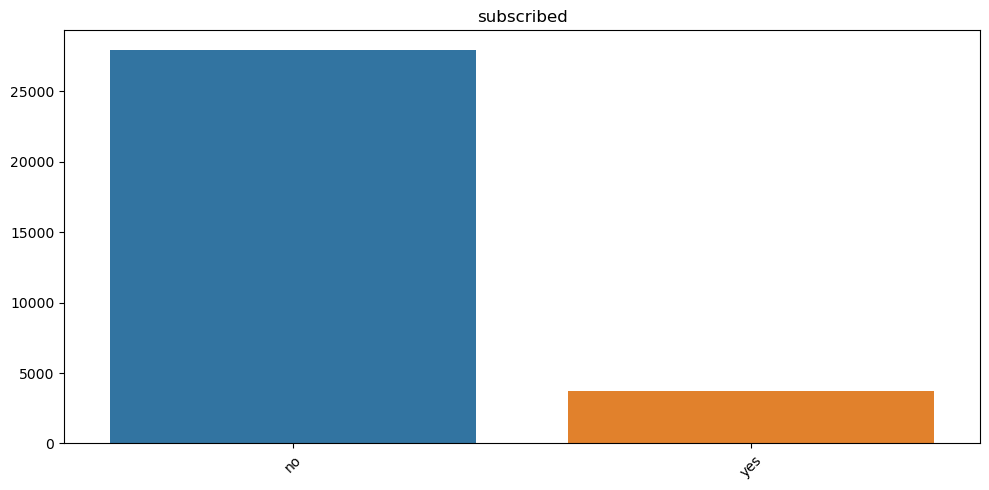

In [10]:

for col in Categorical:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=data[col].value_counts().index, y=data[col].value_counts().values)
    plt.title(col)
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

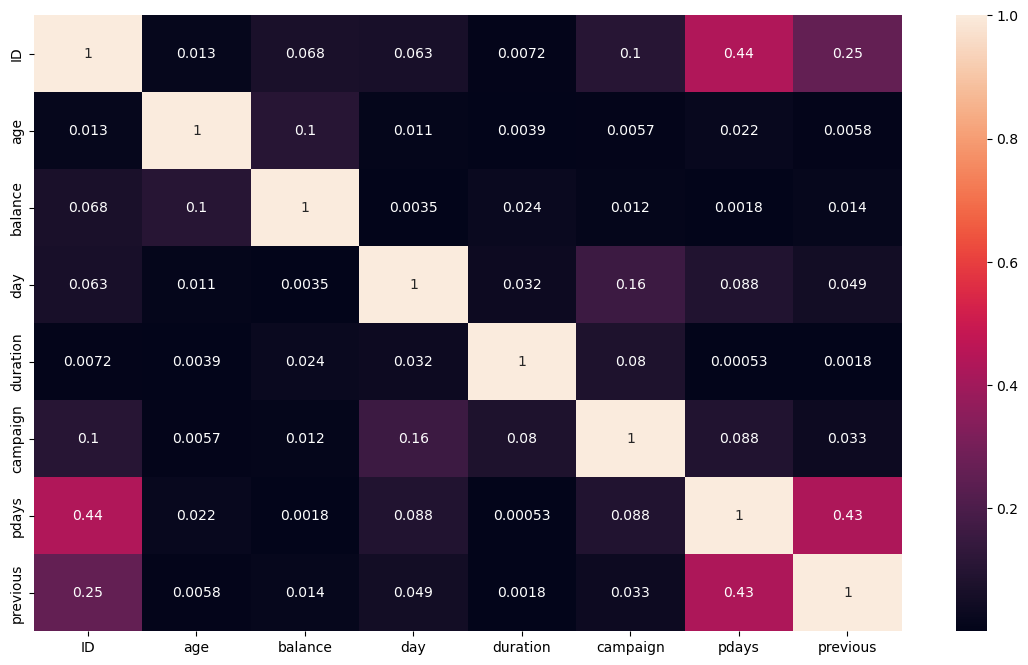

In [11]:
df_corr= data.corr().abs()
plt.figure (figsize=(14,8))
sns.heatmap(df_corr, annot=True,)
plt.show()

In [12]:
data.drop(['marital'],axis=1, inplace=True)
data.drop(['contact'],axis=1, inplace=True)
data.head()

,ID,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,unknown,no,1933,no,no,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,secondary,no,3,no,no,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,secondary,no,891,yes,no,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,tertiary,no,3287,no,no,22,jun,867,1,84,3,success,yes
4,29842,31,technician,secondary,no,119,yes,no,4,feb,380,1,-1,0,unknown,no


In [13]:
data.shape

(31647, 16)

In [14]:
data[['default','housing','loan','subscribed']]=data[['default','housing','loan','subscribed']].replace(["yes","no"],["1","0"])
data['month']=data['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
data['job']=data['job'].replace(['unknown'],['other'])


data.head(5)

,ID,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,unknown,0,1933,0,0,19,11,44,2,-1,0,unknown,0
1,40576,31,other,secondary,0,3,0,0,20,7,91,2,-1,0,unknown,0
2,15320,27,services,secondary,0,891,1,0,18,7,240,1,-1,0,unknown,0
3,43962,57,management,tertiary,0,3287,0,0,22,6,867,1,84,3,success,1
4,29842,31,technician,secondary,0,119,1,0,4,2,380,1,-1,0,unknown,0


In [15]:

Le=LabelEncoder()
data['job']=Le.fit_transform(data['job'])

data['education']=Le.fit_transform(data['education'])

data['poutcome']=Le.fit_transform(data['poutcome'])


In [16]:
data.head(5)

,ID,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,3,0,1933,0,0,19,11,44,2,-1,0,3,0
1,40576,31,5,1,0,3,0,0,20,7,91,2,-1,0,3,0
2,15320,27,8,1,0,891,1,0,18,7,240,1,-1,0,3,0
3,43962,57,4,2,0,3287,0,0,22,6,867,1,84,3,2,1
4,29842,31,10,1,0,119,1,0,4,2,380,1,-1,0,3,0


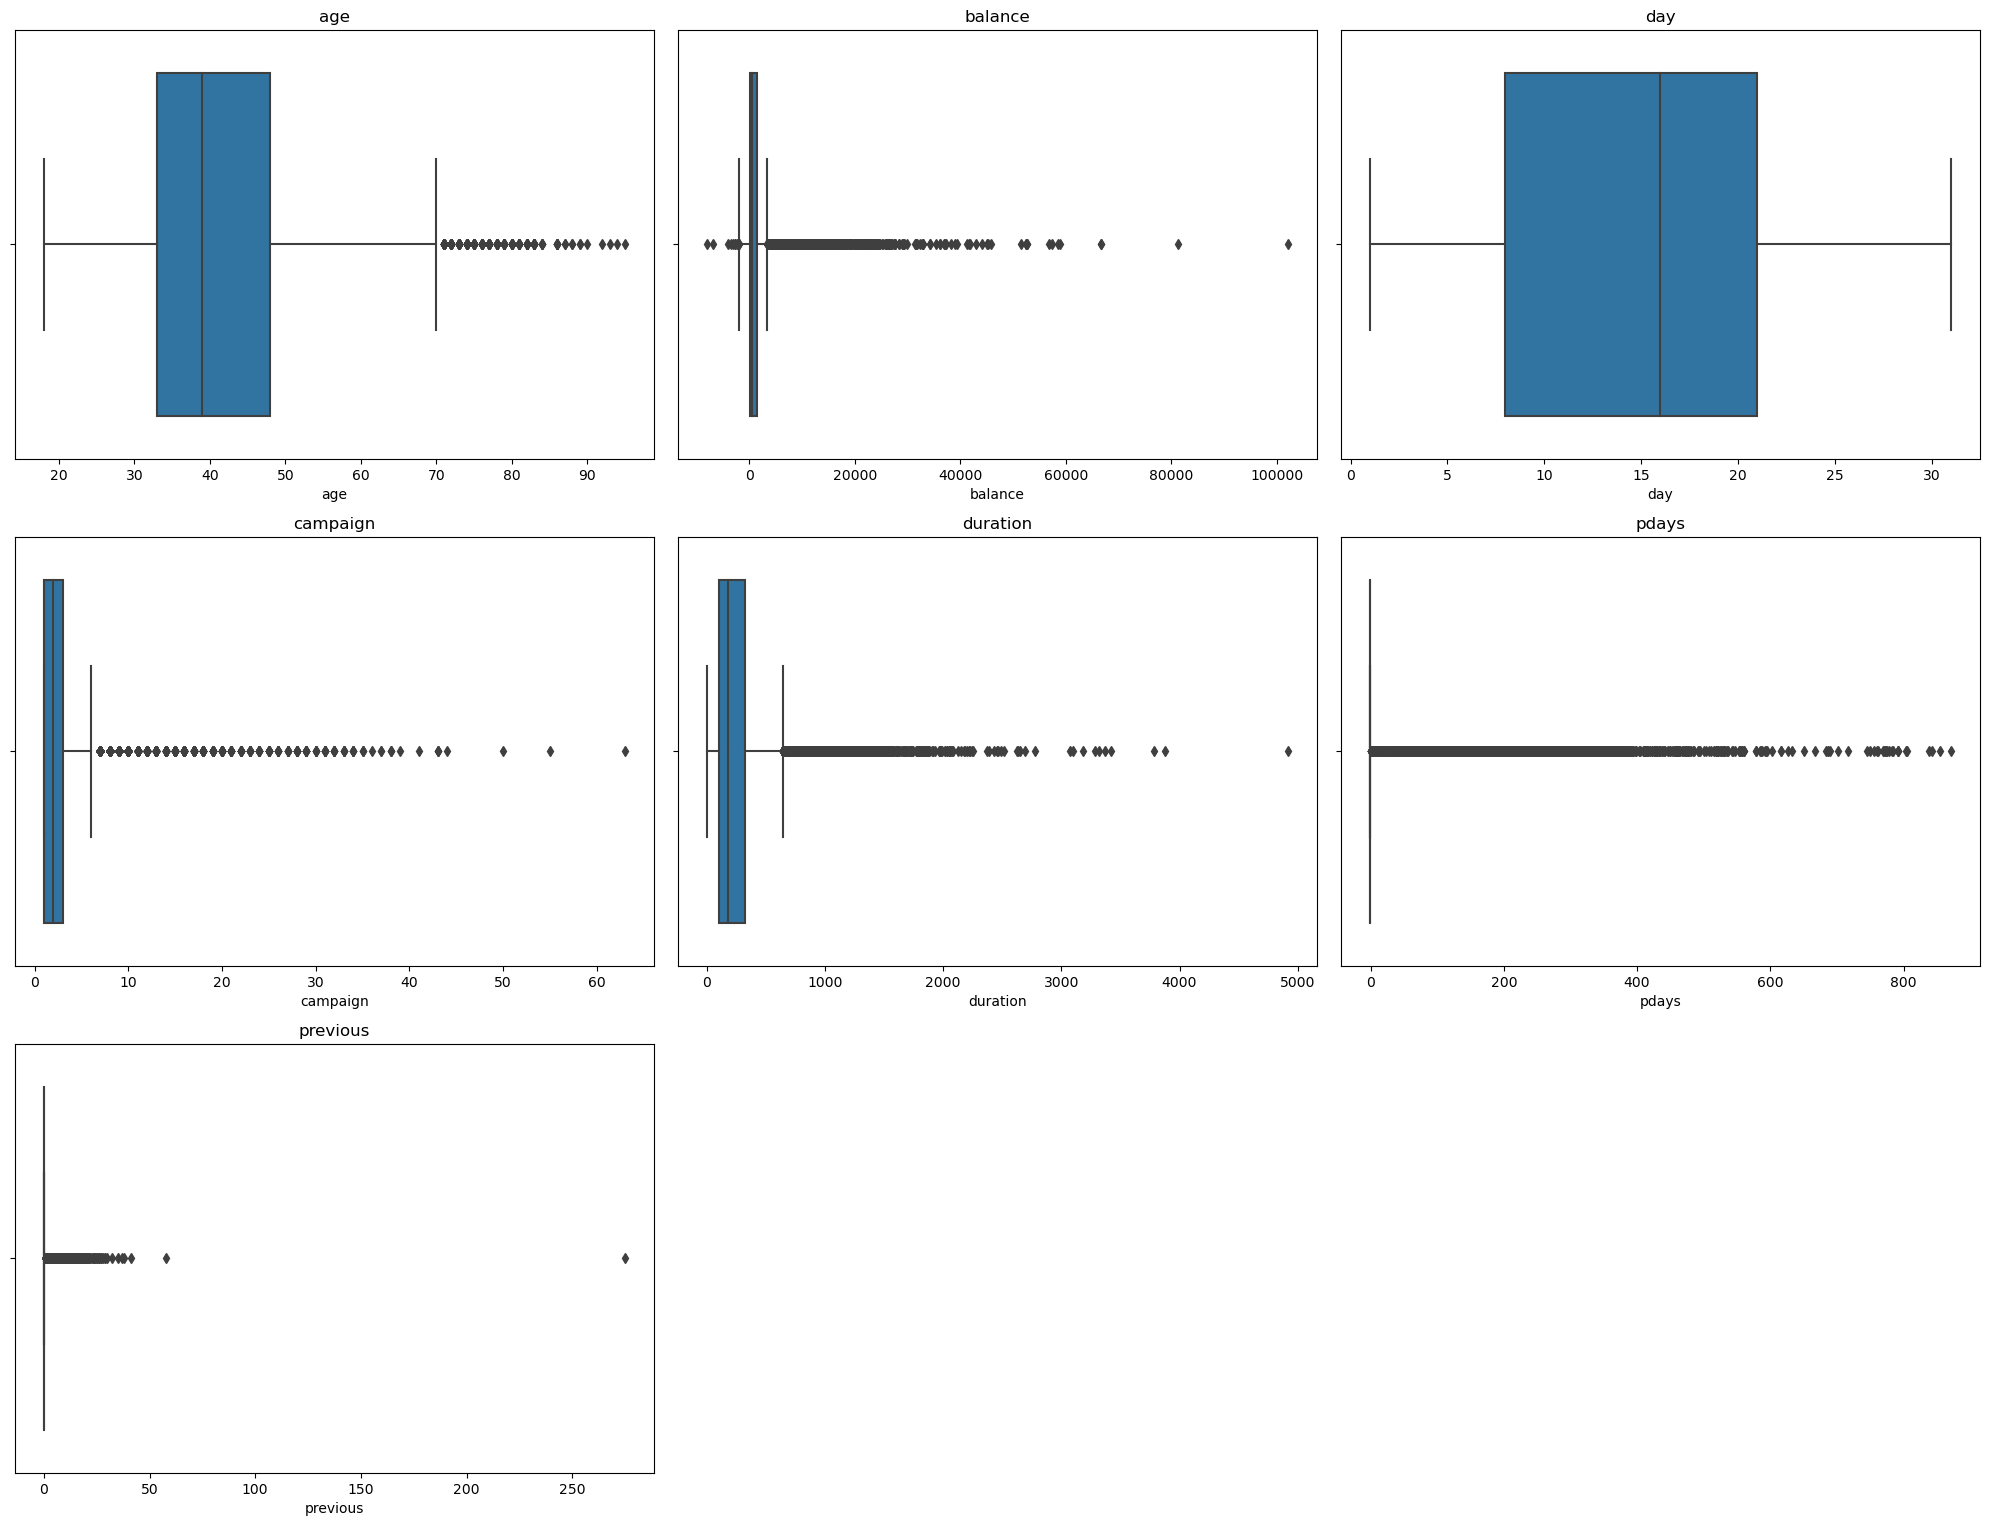

In [18]:
col_names = ['age', 'balance', 'day', 'campaign', 'duration', 'pdays', 'previous']

plt.figure(figsize=(20, 20))
n = 1

for i in col_names:
    plt.subplot(4, 3, n)
    sns.boxplot(data=data, x=i)
    plt.title(i)
    n += 1

plt.tight_layout()
plt.show()

In [20]:
z= np.abs(stats.zscore(data[['age','balance','duration','campaign','pdays','previous']]))
print(z)
data=data[(z<3).all(axis=1)]
data.shape

            age   balance  duration  campaign     pdays  previous
0      1.415793  0.187933  0.832754  0.245906  0.408555  0.237059
1      0.937156  0.449397  0.649957  0.245906  0.408555  0.237059
2      1.313627  0.156159  0.070449  0.567059  0.408555  0.237059
3      1.509911  0.635055  2.368149  0.567059  0.447299  1.001336
4      0.937156  0.411091  0.474054  0.567059  0.408555  0.237059
...         ...       ...       ...       ...       ...       ...
31642  1.125392  0.450388  0.552724  0.245906  0.408555  0.237059
31643  1.133439  0.324903  0.699635  0.245906  0.408555  0.237059
31644  0.843038  0.347358  0.859979  0.075247  0.408555  0.237059
31645  1.509911  0.376088  0.918319  1.359859  2.994723  4.716521
31646  1.321675  0.383022  6.669728  0.245906  0.408555  0.237059

[31647 rows x 6 columns]


(28124, 16)

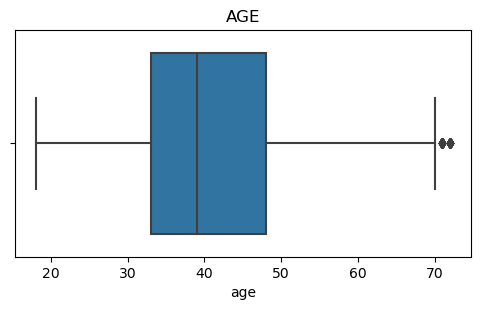

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(data['age'])
plt.title("AGE")
plt.show()

In [26]:
x=data.drop(['subscribed'],axis=1)
y=data['subscribed']


<AxesSubplot:xlabel='subscribed', ylabel='count'>

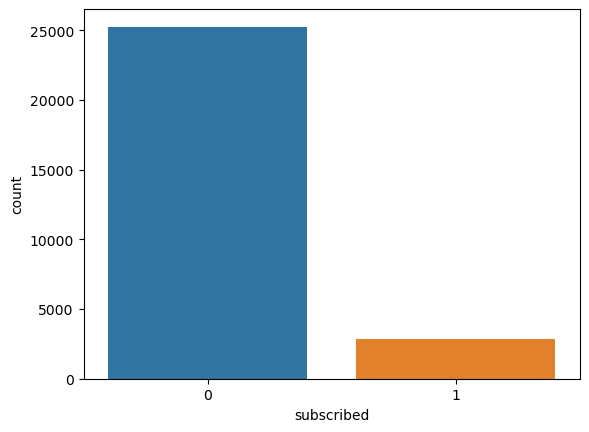

In [27]:
sns.countplot(x='subscribed',data=data)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(data)
x_scaled

array([[ 0.34151241,  1.52281062, -1.27741816, ..., -0.3307921 ,
         0.37763179, -0.33645885],
       [ 1.46195128, -0.95736799,  0.08192606, ..., -0.3307921 ,
         0.37763179, -0.33645885],
       [-0.49420828, -1.35419657,  0.89753259, ..., -0.3307921 ,
         0.37763179, -0.33645885],
       ...,
       [ 1.14493508, -1.15578228, -0.18994279, ..., -0.3307921 ,
         0.37763179, -0.33645885],
       [ 1.43112488,  1.22518918, -0.18994279, ..., -0.3307921 ,
         0.37763179,  2.97213163],
       [-0.15418847, -0.85816085, -0.18994279, ..., -0.3307921 ,
         0.37763179, -0.33645885]])

In [32]:
x_train, x_test, y_train, y_test= train_test_split (x,y, test_size= 0.2, random_state= 4)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score


lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)



In [35]:
pred

array(['0', '0', '0', ..., '0', '1', '0'], dtype=object)

In [37]:
acc=accuracy_score(y_test,pred)
acc

0.8968888888888888

In [39]:
from sklearn.metrics import classification_report
print ( classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5067
           1       0.45      0.16      0.24       558

    accuracy                           0.90      5625
   macro avg       0.68      0.57      0.59      5625
weighted avg       0.87      0.90      0.87      5625



In [41]:
AUC=roc_auc_score(pred,y_test)
AUC


0.6799659819655587

In [42]:
print("ROC_AUC Score:",AUC)



ROC_AUC Score: 0.6799659819655587


[[4954  113]
 [ 467   91]]


<AxesSubplot:>

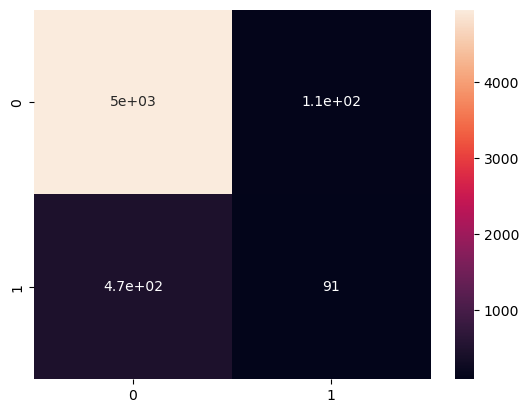

In [44]:
cm=confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True)